<a href="https://colab.research.google.com/github/yonilev2003/Predicting-Drinking-Habits-of-OKcupid-Users/blob/main/Predicting_Drinking_Habits_on_OKcupid_Users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

*“In fiction: we find the predictable boring. In real life: we find the unpredictable terrifying.”* (Mokokoma Mokhonoana).

Machine Learning, just like Psychology, proves how predictable people are. Psychologists and data scientists alike have been describing the world using patterns, tendencies, and trying to understand the mind and personality of the everyday average person.

In my project, I built ML models to try and predict drinking habits based on a dataset of OKcupid users. Most people that stumble upon this dataset build a 98% accuracy model to predict religion. However, I wanted to try and understand people's habits and whether we can or can not predict based on their age, orientation, education, smoking habits, etc.

In [ ]:
# Installing Kaggle API
! pip install kaggle

In [ ]:
# Installing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Setting Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'yonathanlevy'
os.environ['KAGGLE_KEY'] = 'd161e19bbcf37f55b9e5a0d6e5497e55'

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d andrewmvd/okcupid-profiles

# Unzip the dataset
!unzip -o okcupid-profiles.zip

100% 50.6M/50.6M [00:00<00:00, 87.7MB/s]
100% 50.6M/50.6M [00:00<00:00, 93.2MB/s]
Archive:  okcupid-profiles.zip
  inflating: okcupid_profiles.csv    


In [ ]:
# Loading the dataset
profiles = pd.read_csv('okcupid_profiles.csv')

# Looking at the first 5 rows
profiles.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


The dataset consists of 31 columns:
1. age
2. status - relationship status
3. sex
4. orientation
5. body_type - average, fit, other
6. diet
7. drinks - drinking habits
8. drugs - drugs using habits
9. education
10. ethnicity
11. height
12. income
13. job
14. last_online
15. location
16. offspring - whether or not the person has kids or plans of having them
17. pets - whether having/liking pets
18. religion
19. sign - astrological sign
20. smokes - whether the person smokes or not
21. languages
22-31. essay (open questions)

# Cleaning & Analysis

In [ ]:
# Understanding the dataset using .info()
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

**Dropping irrelevant columns**

I dropped "last_online" because of its irrelevance to personality analysis.

Also, I dropped the openp-fill questions for a few reasons:
1. Analyzing both free-text questions and the multiple-choice questions require both ML and NLP algorithms.
2. Such questions ofen have many missing values.
3. Prone to cultural differences in language use and openess for sharing about oneself.

In [ ]:
# Dropping the 10 essay columns
profiles = profiles.drop(columns=[f'essay{i}' for i in range(10)])

# Dropping 'last_online'
profiles = profiles.drop(columns=['last_online'])

**Understanding the distributions**

To understand the distributions and later handle missing values, I wanted to further understand some of the other columns.


In [ ]:
# Understanding the distribution of numerical columns
numerical_summary = profiles.describe()
print("Summary statistics for numerical columns:")
print(numerical_summary)
print()

# Understanding the distribution of categorical columns
categorical_columns = profiles.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Distribution of values in column '{column}':")
    print(profiles[column].value_counts())
    print()

Summary statistics for numerical columns:
                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000

Distribution of values in column 'status':
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

Distribution of values in column 'sex':
m    35829
f    24117
Name: sex, dtype: int64

Distribution of values in column 'orientation':
straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

Distribution of values in column 'body_type':
average           14652
fit               12711


**Manipulating 'diet' column - combining the 'mostly anything', 'anything' and 'strictly anything' into an 'all-eater' option**

Beside merging the three different responses into the same one, I printed the percentage of this feature out of the non-null values in the column.
Later I used this figure to handle the missing values in the column.

In [ ]:
# Replacing 'mostly anything', 'anything' and 'strictly anything' with 'all-eater'
profiles['diet'].replace(['mostly anything', 'anything', 'strictly anything'], 'all-eater', inplace=True)

# Calculating the percentage of 'all-eater' responses out of all the non-null values
all_eater_count = profiles['diet'][profiles['diet'] == 'all-eater'].count()
non_null_diet_count = profiles['diet'].notnull().sum()
all_eater_percentage = (all_eater_count / non_null_diet_count) * 100

all_eater_percentage

78.42536074934601

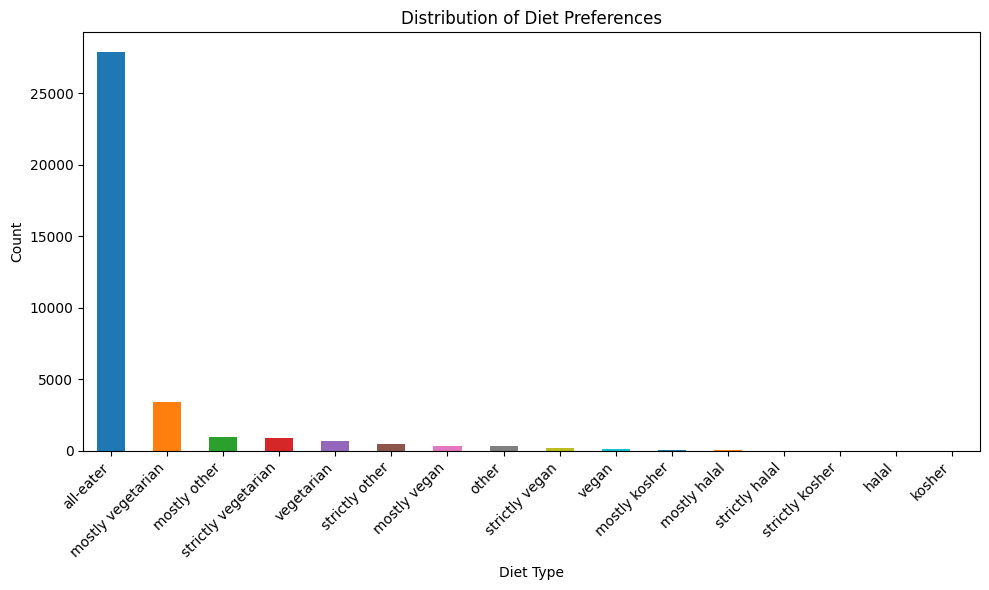

In [ ]:
# Visualizing the new distribution in the 'diet' column
# Saving the value counts in the column in a new variable
updated_distribution = profiles['diet'].value_counts()

# Defining colorblind-friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting
plt.figure(figsize=(10, 6))
updated_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Diet Preferences')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Missing values**

Handling the missing values by column:
1. 'body_type' (8.8% missing values) - I imputed with the 'average' body type.
2. 'diet' (40.694%) - about 78% of the non-missing values are 'all-eater' people. I imputed the missing values with 'all-eater'.
3. 'drinks' (4.97%) - the most predominant response is 'socially' drinking, I mputed the missing values with this option.
4. 'drugs' (23.48%) - the most predominant response is 'never', I imputed missing values with this option.
5. 'education' (11.05%) - most users refer on recieving higher education. However, I took it with a grain of salt the users with higher education wouldn't report it. So I I boxplotted the figures and saw that users who did not report on education level are about the same average age of users who reported on having higher education. However, I wanted to be certain, so I checked if the distribution of ages for the 3 education groups (with, without and nulls) and saw that the data is not evenly distributed. Therefore, I decided to run a Mann-Whitney U test and saw that the there are significant differences in age distributions between individuals with and without higher education, and between individuals without higher education and those who did not report their education. Even though people who did not report their education have a distribution similar more to the group of users who have recieved higher education than the group of people who didn't, I can't associate the nulls group to each. I dropped the null rows.
6. 'ethnicity' (9.47%) - I dropped the null rows.
7. 'height' (0.005%) - I dropped the null rows.
8. 'income' - more than 75% Of the values are assigned as '-1', signifying a lack of reporting from most users. So I dropped this column.
9. 'job' (13.67%) - I guess that most people did not answer to this question because, like the users that answered 'rather not say', they simply did not want to share their livelihood out in the open for everyone, or rather they are unemployed or students. I decided to assign the nulls as 'rather not to say'.
10. 'offspring' (59.32%) - the most predominant responses revolve on not having kids. However, I'm sure some users do have kids but did not report it in the column. Therefore, I dropped this column.
11. 'pets' (33.23%) - the column's purpouse is rather to answer two questions - do you have a pet, and if not, do you like them or not. Along with having more than 30% of missing values, the indirect question complicates analysis. I dropped this column.
12. religion (33.74%) - a great parameter for predicting drinking, smoking and drugs habits. I decided to drop the missing rows.
13. sign (18.44%) - I imputed the null rows with "unspecified". Also, because the column combines the sign itself and perception of importance, I only kept the sign itself.
14. smokes (9.19%) - the predominant response is not smoking, so I imputed missing rows with 'no'.
15. speaks (0.083%) - I dropped missing rows with "English (fluently)".

In [ ]:
# Printing missing values
(profiles.isnull().sum() / len(profiles)) * 100

age             0.000000
status          0.000000
sex             0.000000
orientation     0.000000
body_type       8.834618
diet           40.694959
drinks          4.979482
drugs          23.487806
education      11.056618
ethnicity       9.475194
height          0.005005
income          0.000000
job            13.675641
location        0.000000
offspring      59.321723
pets           33.231575
religion       33.740366
sign           18.443266
smokes          9.194942
speaks          0.083408
dtype: float64

In [ ]:
# Imputing missing values in 'body_type' with 'average'
profiles['body_type'] = profiles['body_type'].fillna('average')

In [ ]:
# Imputing missing values in 'diet' column with 'all-eater'
profiles['diet'] = profiles['diet'].fillna('all-eater')

In [ ]:
# Imputing missing values in 'drinks' with 'socially'
profiles['drinks'] = profiles['drinks'].fillna('socially')

In [ ]:
# Imputing missing values in 'drugs' with 'never'
profiles['drugs'] = profiles['drugs'].fillna('never')

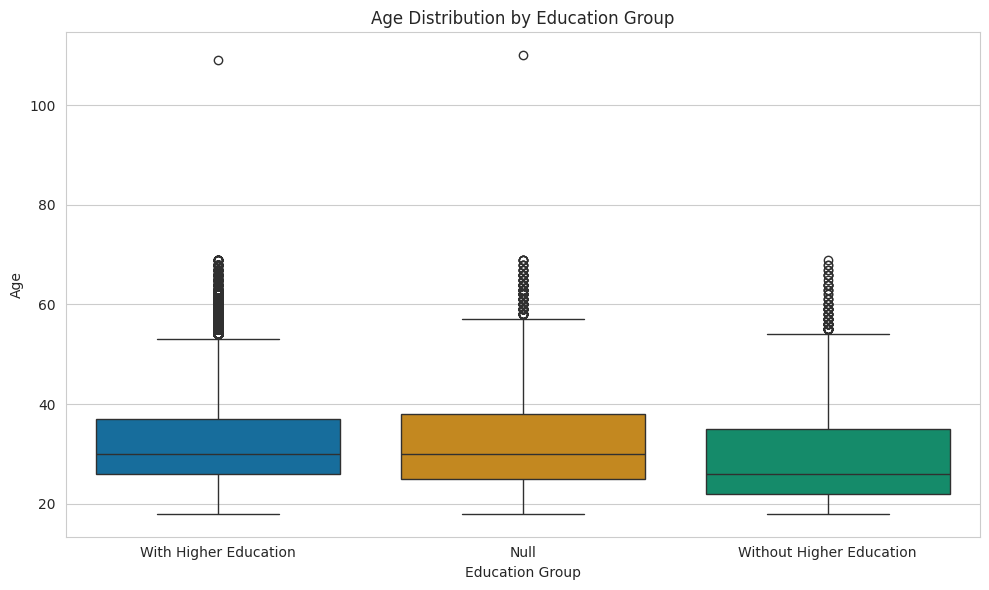

In [ ]:
# Understanding the distributions of ages of people with, without higher education and with no responding on education using box plots
# Defining the groups for 'education' based on the user input
without_higher_education = ['working on high school', 'high school', 'dropped out of high school']
higher_education = ['graduated from college/university', 'graduated from masters program',
    'working on college/university', 'working on masters program',
    'graduated from two-year college', 'graduated from ph.d program',
    'graduated from law school', 'working on two-year college',
    'dropped out of college/university', 'working on ph.d program',
    'college/university', 'graduated from space camp', 'dropped out of space camp',
    'graduated from med school', 'working on space camp', 'working on law school',
    'two-year college', 'working on med school', 'dropped out of two-year college',
    'dropped out of masters program', 'masters program', 'dropped out of ph.d program',
    'dropped out of high school', 'high school', 'working on high school',
    'space camp', 'ph.d program', 'law school', 'dropped out of law school',
    'dropped out of med school', 'med school']

# Dynamically categorizing education levels for a new DataFrame
def categorize_education(row):
    if pd.isna(row):
        return 'Null'
    elif any(education in row for education in without_higher_education):
        return 'Without Higher Education'
    elif any(education in row for education in higher_education):
        return 'With Higher Education'
    else:
        return 'Other'

# Creating a new DataFrame for plotting
plotting_data = profiles.copy()
plotting_data['education_group'] = plotting_data['education'].apply(categorize_education)

# Setting the style of seaborn
sns.set_style("whitegrid")

# Creating the box plot for age by education group in the new DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_group', y='age', hue='education_group', data=plotting_data, palette='colorblind')
plt.title('Age Distribution by Education Group')
plt.xlabel('Education Group')
plt.ylabel('Age')
plt.xticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Checking if the ages in the three education groups are normally distributed using Shapiro-Wilk test
# Defining a function to test normality and sample 5000 samples (the maximum the test can handle)
def test_normality(data):
    if len(data) > 5000:
        data = data.sample(5000, random_state=1)
    stat, p_value = stats.shapiro(data)
    return p_value, 'Normally distributed' if p_value > 0.05 else 'Not normally distributed'

# Performing the Shapiro-Wilk test for each education group
shapiro_results = {}
for group in plotting_data['education_group'].unique():
    group_data = plotting_data[plotting_data['education_group'] == group]['age']
    shapiro_results[group] = test_normality(group_data)

# Printing out the results
shapiro_results

{'With Higher Education': (0.0, 'Not normally distributed'),
 'Null': (2.802596928649634e-45, 'Not normally distributed'),
 'Without Higher Education': (8.7642531341454e-36, 'Not normally distributed')}

In [ ]:
# Performing Mann-Whitney U test for each pair of education groups
# Extract the age data for each group
ages_with_higher_education = plotting_data[plotting_data['education_group'] == 'With Higher Education']['age']
ages_without_higher_education = plotting_data[plotting_data['education_group'] == 'Without Higher Education']['age']
ages_null_education = plotting_data[plotting_data['education_group'] == 'Null']['age']

# Perform the Mann-Whitney U tests
mwu_results = {
    'With Higher Education vs. Without Higher Education': stats.mannwhitneyu(ages_with_higher_education, ages_without_higher_education, alternative='two-sided'),
    'With Higher Education vs. Null': stats.mannwhitneyu(ages_with_higher_education, ages_null_education, alternative='two-sided'),
    'Without Higher Education vs. Null': stats.mannwhitneyu(ages_without_higher_education, ages_null_education, alternative='two-sided')
}

mwu_results

{'With Higher Education vs. Without Higher Education': MannwhitneyuResult(statistic=55027392.5, pvalue=5.2843447953641685e-67),
 'With Higher Education vs. Null': MannwhitneyuResult(statistic=170427519.0, pvalue=0.6458690613555451),
 'Without Higher Education vs. Null': MannwhitneyuResult(statistic=4365264.5, pvalue=2.1711765952749466e-49)}

In [ ]:
# Dropping null rows in the 'education' column
profiles.dropna(subset=['education'], inplace=True)

In [ ]:
# Dropping null rows in the 'ethnicity' column
profiles.dropna(subset=['ethnicity'], inplace=True)

In [ ]:
# Dropping null rows in the 'height' column
profiles.dropna(subset=['height'], inplace=True)

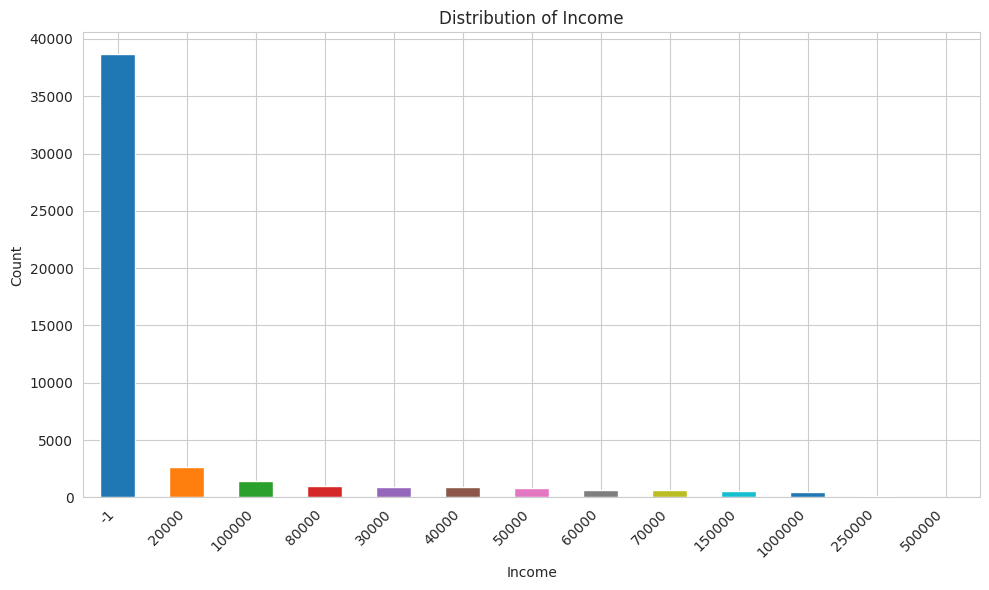

In [ ]:
# Visualizing the 'income' column to see the distribution visually
# Defining colorblind-friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Visualize the distribution of values in the 'income' column
plt.figure(figsize=(10, 6))
profiles['income'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Dropping the 'income' column
profiles.drop(columns=['income'], inplace=True)

In [ ]:
# Combining nulls in 'job' column with the answe 'rather not say'
profiles['job'].fillna('rather not to say', inplace=True)

In [ ]:
# Dropping 'offspring' column
profiles.drop('offspring', axis=1, inplace=True)

<ipython-input-26-d2e44dd73d26>:10: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=pets_counts.index, y=pets_counts.values, hue=pets_counts.index, palette=colors, legend=False)


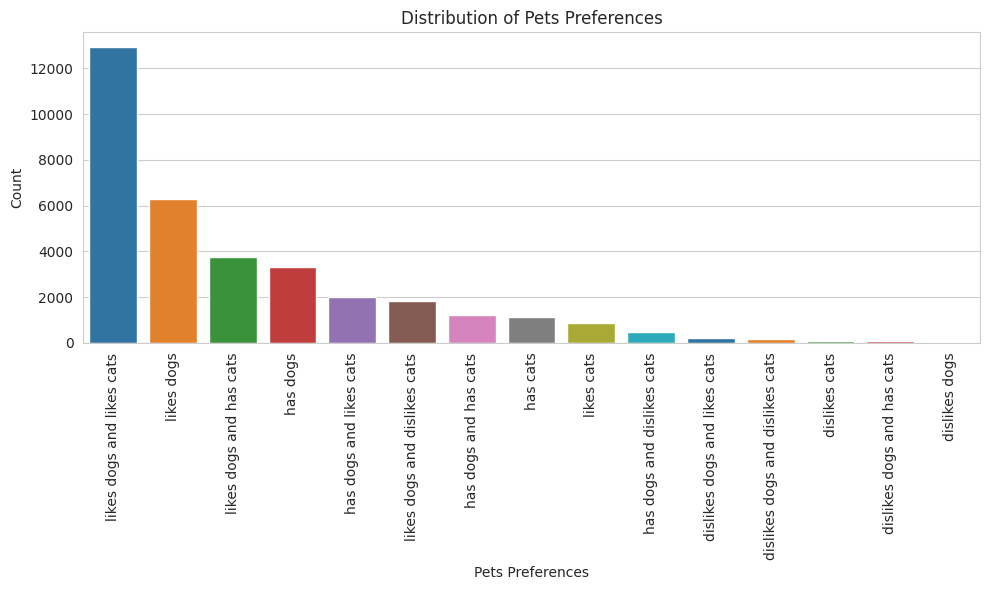

In [ ]:
# Visualizing the 'pets' column to see the distribution visually
# Counting the unique values in the 'pets' column
pets_counts = profiles['pets'].value_counts()

# Defining colorblind-friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=pets_counts.index, y=pets_counts.values, hue=pets_counts.index, palette=colors, legend=False)
plt.title('Distribution of Pets Preferences')
plt.xlabel('Pets Preferences')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Dropping 'pets' column
profiles.drop('pets', axis=1, inplace=True)

In [ ]:
# Dropping null rows in 'religion'
profiles.dropna(subset=['religion'], inplace=True)

In [ ]:
# Imputing missing rows in 'speaks' column with 'English (fluently)'
profiles['speaks'].fillna("English (fluently)", inplace=True)

In [ ]:
# Dropping missing rows in 'sign'
profiles.dropna(subset=['sign'], inplace=True)

In [ ]:
# Imputing missing rows in 'smokes' column with 'no'
profiles['smokes'].fillna("no", inplace=True)

**The thing with location**

Looking at the distribution of the 'location' column, about 99.8% of users are Californians. Given this fact, and that analysing the locations (mostly within this state) is resource-intensive. So I dropped this column.

Percentage of people in California: 99.84621928475607


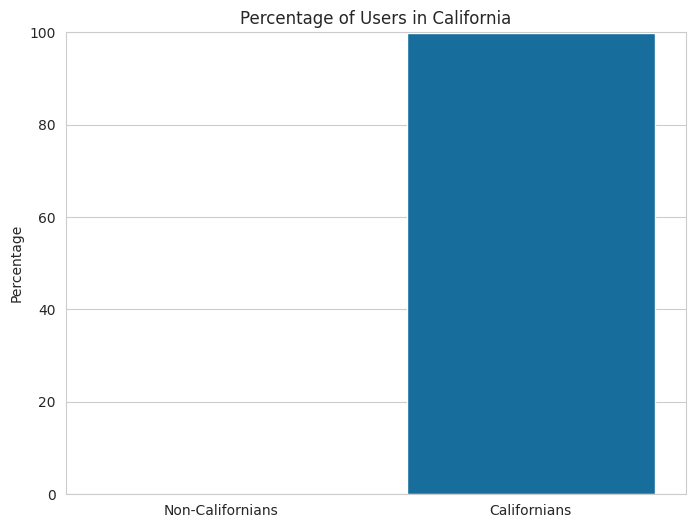

In [ ]:
# Checking how many of the users (in %) are Californians
california_count = profiles[profiles['location'].str.contains('california', case=False)].shape[0]
total_people = profiles.shape[0]

percentage_california = (california_count / total_people) * 100

print("Percentage of people in California:", percentage_california)

# Setting colorblind-friendly palette
sns.set_palette('colorblind')

# Visualizing Californians vs. others
plt.figure(figsize=(8, 6))
sns.barplot(x=['Non-Californians', 'Californians'], y=[100 - percentage_california, percentage_california])
plt.title('Percentage of Users in California')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

In [ ]:
# Dropping 'location' column
profiles.drop('location', axis=1, inplace=True)

**The 'speaks' column**

Most users are Californians, a state in  an English-speaking country. Moreover, there is not even one user who mentioned not speaking English. Therefore, this column is irrelevant for the purpouse of separating English and non-English speakers.

Multilingualism might indicate different behavior than people who speak only English. Therefore, I wanted to mention if a person is multilingual and fluent in at least 2 languages.

First, for people who reported on speaking English without mentioning their level, I assumed fluency and imputed with "fluently".

Then, I counted how many languages people speak. If they are fluent in 2 languages or more, then I deemed them as true multilingual. If a person speaks more than one language, but not fluent in 2 languages or more (or else, speaks 7 languages poorly or just ok), I deemed them as somewhat multilinguals.

I changed the name of the column from 'speaks' to 'multilingual' and converted it to numeric, where 0 indicate for users who speak only English, 1 for people who are somewhat multilinguals and 2 for true multilinguals.

In [ ]:
# Counting how many users don't speak English at all
non_english_count = profiles[~profiles['speaks'].str.contains("English", na=False, case=False)].shape[0]
print("Number of entries that don't contain English:", non_english_count)

Number of entries that don't contain English: 0


In [ ]:
# Imputing missing fluency for people who only speak English with 'fluently'
profiles['speaks'] = profiles['speaks'].str.replace('english', 'english (fluently)')

# Defining a function to classify multilingualism, where 0 means speaking only English, 1 for somewhat multilinguals and 2 for true multilinguals
def classify_multilingual(speaks):
    if ',' in speaks:
        if speaks.count('(fluently)') >= 2:
            return 2
        else:
            return 1
    else:
        return 0

# Applying the function to the 'speaks' column to create the 'multilingual' column
profiles['multilingual'] = profiles['speaks'].apply(classify_multilingual)

non_english_count = profiles[~profiles['speaks'].str.contains("English", na=False, case=False)].shape[0]
non_english_count, profiles['multilingual'].value_counts()

(0,
 2    14079
 0    13083
 1     3401
 Name: multilingual, dtype: int64)

In [ ]:
# Dropping 'speaks' column
profiles.drop(columns=['speaks'], inplace=True)

**The 'religion' column**

The distribution of the column includes a combination of one's religion (or lack of religion) and seriousness in religiousness.
I made a function to extract and return only the name of the religion, without the religiousness level.

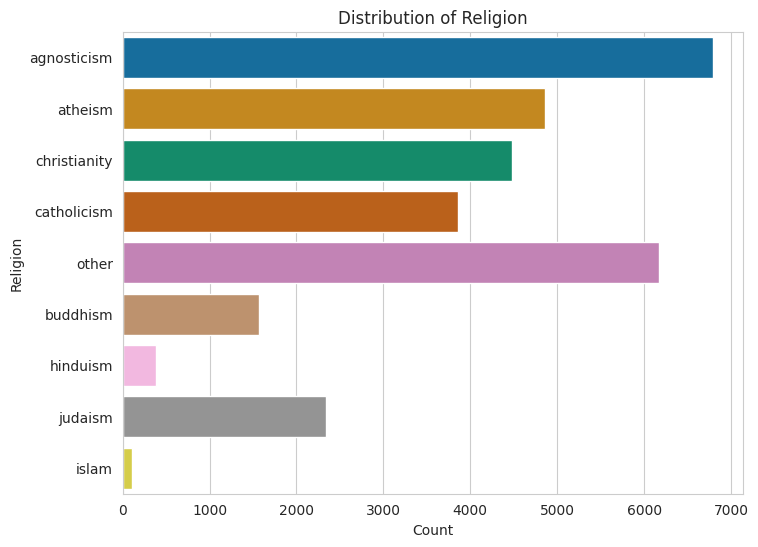

In [ ]:
# Splitting the 'religion' column to include only the religion, not the religiousness level
profiles['religion'] = profiles['religion'].str.split().str.get(0)

# Setting colorblind-friendly palette with fewer colors
palette = sns.color_palette("colorblind", 9)

# Creating the count plot with 'hue' assigned
plt.figure(figsize=(8, 6))
sns.countplot(data=profiles, y='religion', hue='religion', palette=palette, legend=False)
plt.xlabel('Count')
plt.ylabel('Religion')
plt.title('Distribution of Religion')
plt.show()

**The 'sign' column**

The distribution of the olumn includes a combination of one's sign and perception of importance for the user's sign. I wanted to keep only the person's sign.

<ipython-input-38-54c001c35fff>:9: UserWarning: 
The palette list has fewer values (9) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=profiles, y='sign', hue='sign', palette=palette, legend=False)


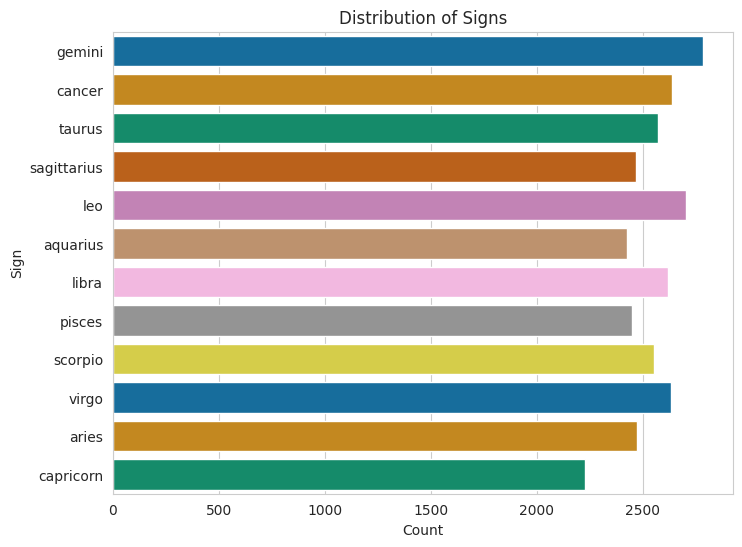

In [ ]:
# Splitting the 'sign' column to include only the sign, not the perception of importance
profiles['sign'] = profiles['sign'].str.split().str.get(0)

# Setting colorblind-friendly palette with fewer colors
palette = sns.color_palette("colorblind", 9)

# Creating the count plot with 'hue' assigned
plt.figure(figsize=(8, 6))
sns.countplot(data=profiles, y='sign', hue='sign', palette=palette, legend=False)
plt.xlabel('Count')
plt.ylabel('Sign')
plt.title('Distribution of Signs')
plt.show()

**The 'age' column**

I turned the ages into decades, and refered any user 60 years-old or more as 60s+.

In [ ]:
# Defining a function to categorize ages into decades
def categorize_age(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s+'

# Applying the function to the 'age' column
profiles['age'] = profiles['age'].apply(categorize_age)

# Display the resulting DataFrame
print(profiles['age'].head())

0    20s
1    30s
5    20s
7    30s
8    20s
Name: age, dtype: object


**The 'job' column**

There are many working types mentioned in OKcupid, and also many options for people who don't. I merged all the working types mentioned (except for military) as 'working_specified'.

The 'other' option refers both for people who work in different indsutry than the ones mentioned in the 'working option_specified', and people who don't see themselves as unemployed, students, etc. To be cautious, I kept 'others' as it is.

In [ ]:
# Merging any working option possible to 'working_option_specified'
working_option_specified = [
    'science / tech / engineering', 'computer / hardware / software',
    'artistic / musical / writer', 'sales / marketing / biz dev',
    'medicine / health', 'education / academia', 'executive / management',
    'banking / financial / real estate', 'entertainment / media',
    'law / legal services', 'hospitality / travel', 'construction / craftsmanship',
    'clerical / administrative', 'political / government', 'transportation'
]

# Replacing those working options with 'working_option_specified'
profiles['job'] = profiles['job'].replace(working_option_specified, 'working_specified')

# Checking
profiles['job'].value_counts()

working_specified    21043
other                 4250
student               2932
rather not to say     1631
rather not say         244
unemployed             192
retired                153
military               118
Name: job, dtype: int64

**Checking duplicates**

In [ ]:
# Checking for duplicates
profiles.duplicated().sum()

158

In [ ]:
# Dropping duplicates
profiles.drop_duplicates(inplace=True)

# Preparing for ML

**Separating features and target variable**

In [ ]:
X = profiles.drop('drinks', axis=1)
y = profiles['drinks']

**Identifying the numerical and cateogircla columns**

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

**Defining the ColumnTransformer**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

**Splitting the dataset into training, validation, and test sets**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Creating a pipeline with preprocessing and TruncatedSVD**

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svd', TruncatedSVD(n_components=50))])

**Applying the pipeline to the training data and transforming the training, validation and test sets**

In [ ]:
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)
X_train_transformed.shape, X_val_transformed.shape, X_test_transformed.shape

((21283, 50), (4561, 50), (4561, 50))

# ML

**Running 3 models in ensemble**

In [ ]:
#Defining the ML models withnin the ensemble model**
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(max_iter=200, solver='liblinear', random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=10, random_state=42)

# Creating the ensemble model with VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('lr', logistic_regression),
    ('gb', gradient_boosting)],
    voting='hard')

# Training the ensemble model on the transformed training set
ensemble_model.fit(X_train_transformed, y_train)

# Predicting on the transformed validation set with the ensemble model
y_val_pred_ensemble = ensemble_model.predict(X_val_transformed)

# Calculating and printing the accuracy on the validation set for the ensemble model
val_accuracy_ensemble = accuracy_score(y_val, y_val_pred_ensemble)
val_accuracy_ensemble

0.7230870423152818

In [ ]:
# Calculating precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_ensemble, average='weighted')
recall = recall_score(y_val, y_val_pred_ensemble, average='weighted')
f1 = f1_score(y_val, y_val_pred_ensemble, average='weighted')

# Printing precision, recall, and F1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.5231281036399373
Recall: 0.7230870423152818
F1 Score: 0.6070655687996219


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


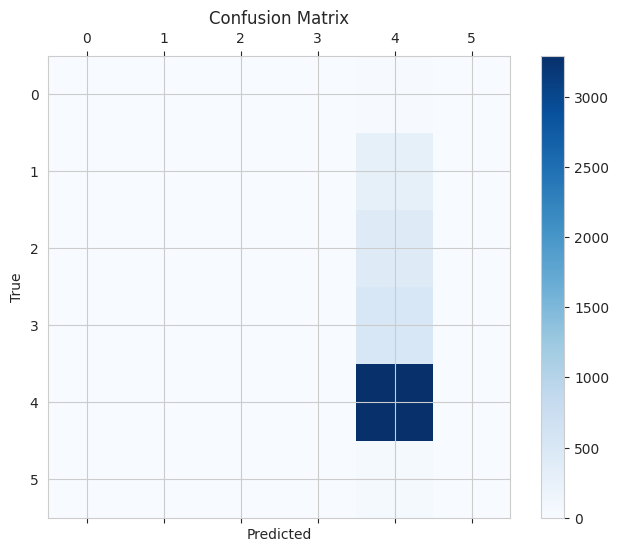

In [ ]:
# Generating a confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_ensemble)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tuning the model

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Predict on the transformed validation set using the best found parameters
y_val_pred_best = grid_search.predict(X_val_transformed)

# Calculate and print the accuracy on the validation set
val_accuracy_best = accuracy_score(y_val, y_val_pred_best)
print("Validation Accuracy with Best Parameters:", val_accuracy_best)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.7192595212485052
Validation Accuracy with Best Parameters: 0.7233062924797193
